In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':[10,10]},font_scale=1.2)


In [ ]:
df=pd.read_csv('/content/machine f prediction.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


check outliers ?


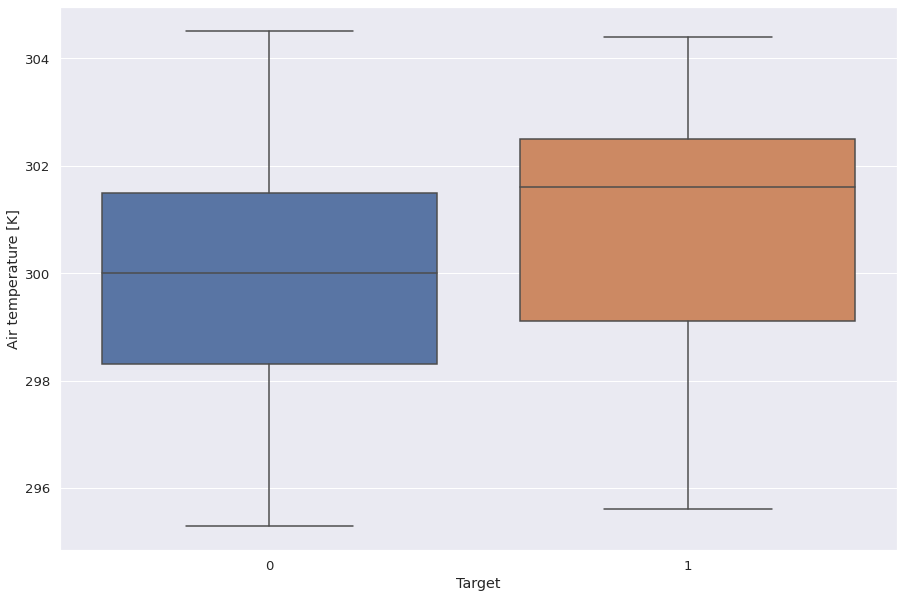

In [ ]:
plt.figure(figsize=(15,10))

sns.boxplot(x='Target',y='Air temperature [K]',data=df)

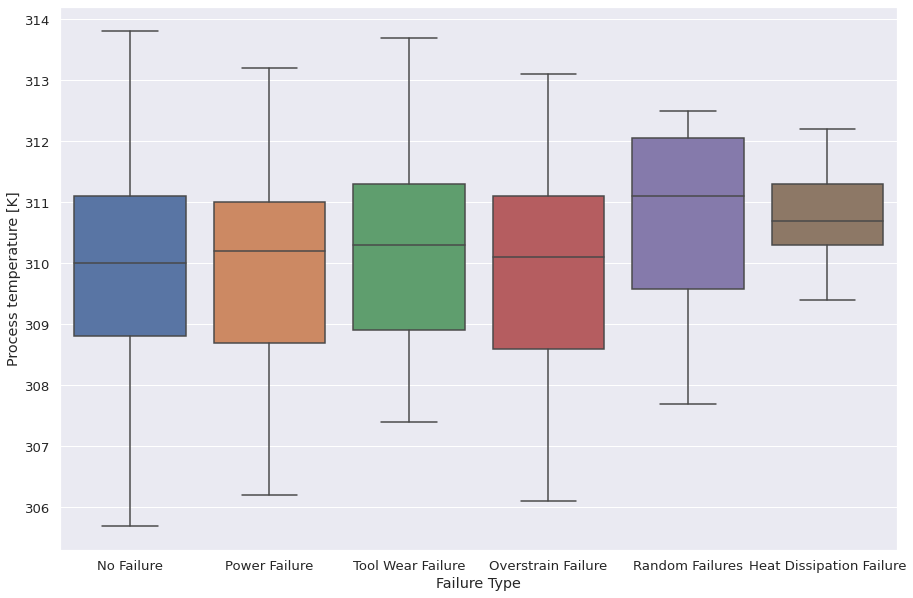

In [ ]:
plt.figure(figsize=(15,10))

sns.boxplot(x='Failure Type',y='Process temperature [K]',data=df)

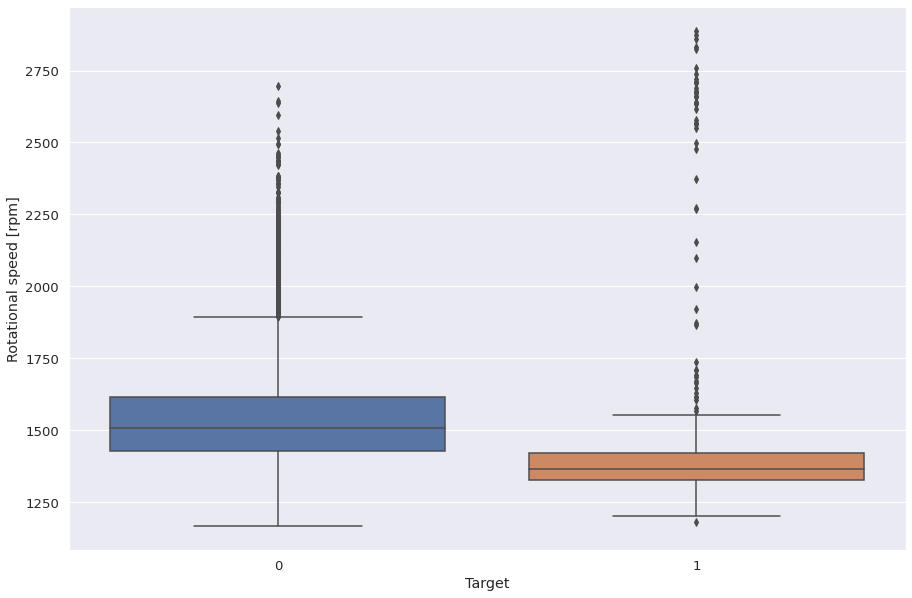

In [ ]:
plt.figure(figsize=(15,10))

sns.boxplot(x='Target',y='Rotational speed [rpm]',data=df)

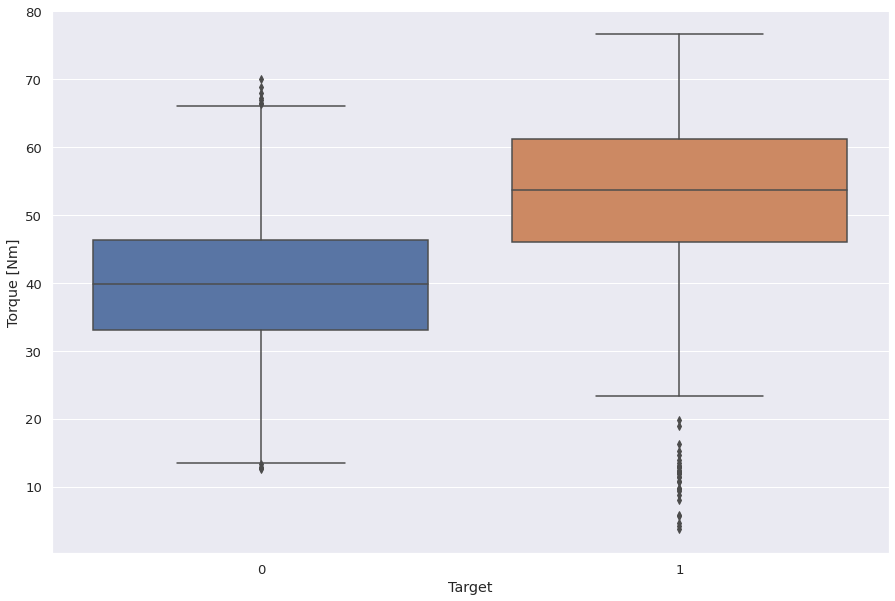

In [ ]:
plt.figure(figsize=(15,10))

sns.boxplot(x='Target',y='Torque [Nm]',data=df)

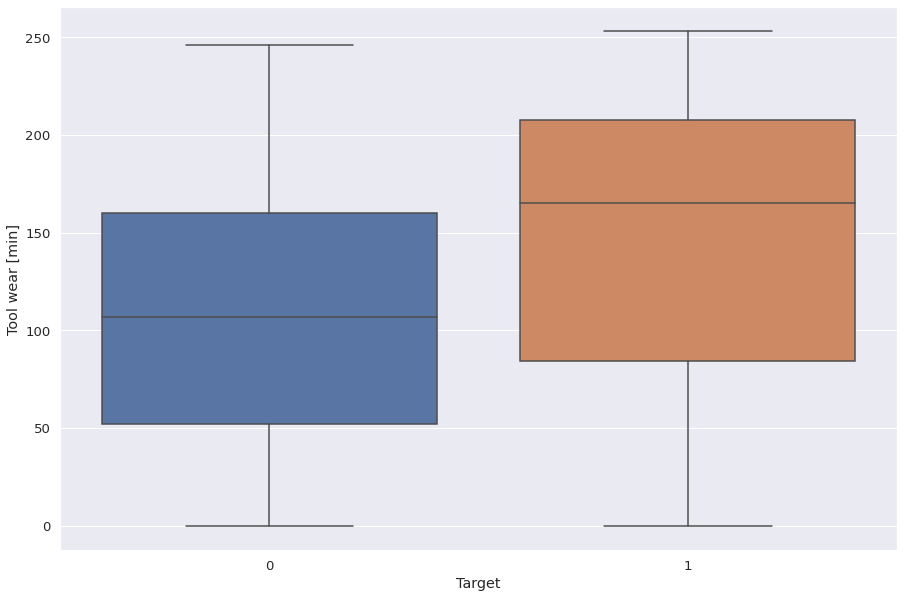

In [ ]:
plt.figure(figsize=(15,10))

sns.boxplot(x='Target',y='Tool wear [min]',data=df)

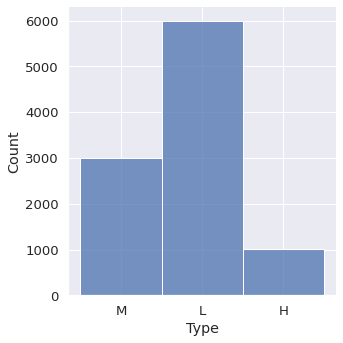

In [ ]:
sns.displot(x='Type',data=df)

In [ ]:
df['Target'].unique().tolist()

[0, 1]

In [ ]:
!pip install datasist 

In [ ]:
from datasist.structdata import detect_outliers

In [ ]:
i= detect_outliers(df,0,['Target','Air temperature [K]','Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])

In [ ]:
df.drop(i,axis=0,inplace=True)

In [ ]:
df.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [ ]:
df['Target'].value_counts()


0    9274
Name: Target, dtype: int64

In [ ]:
clean=pd.get_dummies(df,columns=['Type'],drop_first=True)
clean

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,No Failure,0,1
1,298.2,308.7,1408,46.3,3,0,No Failure,1,0
2,298.1,308.5,1498,49.4,5,0,No Failure,1,0
3,298.2,308.6,1433,39.5,7,0,No Failure,1,0
4,298.2,308.7,1408,40.0,9,0,No Failure,1,0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure,0,1
9996,298.9,308.4,1632,31.8,17,0,No Failure,0,0
9997,299.0,308.6,1645,33.4,22,0,No Failure,0,1
9998,299.0,308.7,1408,48.5,25,0,No Failure,0,0


In [ ]:
clean.drop('Failure Type',axis=1,inplace=True)

founded impalaced data 
**bold text**
feature scaling ,
split ,
imbalanced, 
model,

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x=clean.drop('Target',axis=1)
y=df['Target']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test=scaler.transform(x_test)

In [ ]:
clean


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1
9996,298.9,308.4,1632,31.8,17,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1
9998,299.0,308.7,1408,48.5,25,0,0,0


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
model = LogisticRegression()
params = [
    {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [1, 10, 100, 1000]}
]

In [ ]:
model = KNeighborsClassifier()
params = [
    {'n_neighbors': range(5, 30, 2)}
]

In [ ]:
model = DecisionTreeClassifier()
params = [
    {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20)}
]

In [ ]:
model = SVC()
params = [
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': range(2, 20)},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid']}
]

In [ ]:
model = RandomForestClassifier()
params = [
    {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20), 'n_estimators': range(100, 501, 50)}
]

In [ ]:
model = XGBClassifier()
params = [
    {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20), 'n_estimators': range(100, 501, 50)}
]

In [ ]:
gs = GridSearchCV(estimator=model, param_grid=params, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
#gs = RandomizedSearchCV(estimator=model, param_distributions=params, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

In [ ]:
gs.fit(x, y)

Fitting 10 folds for each of 342 candidates, totalling 3420 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3420 fits failed out of a total of 3420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3420 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 726, in fit
    missing=self.missing, nthread=self.n_jobs)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 426, in __init__
    self.feature_names = feature_names
  File "/usr/local/lib/python3.7/dist-packages/xgboost

ValueError: ignored

In [ ]:
gs.best_score_

nan